In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_test.shape

(10000, 28, 28)

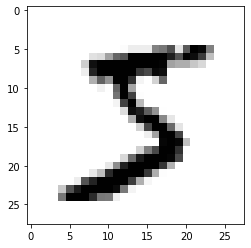

In [3]:
plt.imshow(X_train[0], cmap = 'binary')

In [4]:
# (60000, 28, 28)
# (60000, 28, 28, 1)
# (x, y, 1)
# (x, y, 3)

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train = X_train/255.0 #minmax 0~1로 한거
X_test = X_test/255.0

In [15]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28, 28, 1,)))
model.add(MaxPool2D(pool_size=(2, 2))) #1/2 배를 해주는거
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='valid', strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 36)          14436     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 311,182
Trainable params: 311,182
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, Y_train, batch_size=200, epochs=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 8s 171us/step - loss: 0.2697 - acc: 0.9202 - val_loss: 0.0905 - val_acc: 0.9738


In [7]:
score = model.evaluate(X_test, Y_test)
print(score)

10000/10000 [==============================] - 1s 85us/step
[0.08370949941463768, 0.9737]


In [8]:
'''
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          14436     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
=================================================================
'''
l1 = model.get_layer('conv2d_1')
l1.get_weights()[0].shape
# (5, 5, 1, 16) 리쉐이프한 배열
# ==
# (16, 5, 5, 1) 내가 생각하는 배열


(5, 5, 1, 16)

In [9]:
def plot_weight(w):
    w_min = np.min(w)
    w_max = np.max(w)
    
    num_grid = math.ceil(math.sqrt(w.shape[3]))
    
    fix, axis = plt.subplots(num_grid, num_grid)
    for i, ax in enumerate(axis.flat):
        if i < w.shape[3]:
            img = w[:, :, 0, i]
            ax.imshow(img, vmin=w_min, vmax=w_max)
            
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

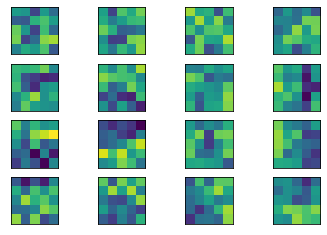

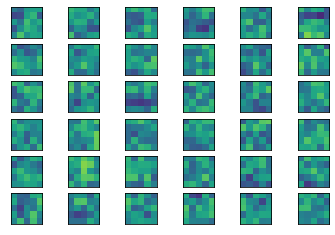

In [10]:
l1 = model.get_layer('conv2d_1')
w1 = l1.get_weights()[0]
plot_weight(w1)

l2 = model.get_layer('conv2d_2')
w2 = l2.get_weights()[0]
plot_weight(w2)

In [11]:
'''
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          14436     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
=================================================================
'''
temp_model = Model(inputs=model.get_layer('conv2d_1').input, outputs=model.get_layer('conv2d_2').output)
output = temp_model.predict(X_test)

In [12]:
output.shape

(10000, 8, 8, 36)

In [13]:
def plot_output(output):

    num_grid = math.ceil(math.sqrt(output.shape[3]))
    
    fix, axis = plt.subplots(num_grid, num_grid)
    for i, ax in enumerate(axis.flat):
        if i < output.shape[3]:
            img = output[0, :, :, i]
            ax.imshow(img, cmap='binary')
            
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

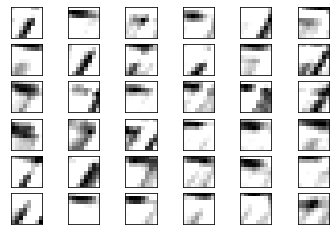

In [14]:
plot_output(output)